# Course 3: Project - Part 2 - House prices

<a name="top"></a>
This notebook is concerned with Part 2 - House prices.

**Contents:**
* [Imports](#imports)
* [Perform data cleaning](#stage-1)
  * [Step 1 - Find and handle incorrect and missing values](#stage-1-step-1)
  * [Step 2 - Find and correct inconsistencies](#stage-1-step-2)
  * [Step 3 - Find and handle outliers](#stage-1-step-3)
* [Perform feature encoding](#stage-2)
* [Perform feature engineering](#stage-3)

## Imports<a name="imports"></a> ([top](#top))
---

In [106]:
# Standard library:
import collections
import functools
import pathlib
import math
import typing as T
import warnings

# 3rd party:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Project:
import utils

%matplotlib inline

In [107]:
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/taariet1/ContEd/Adsml/git/course-03-project/house-prices/utils.py'>

## Perform data cleaning<a name="stage-1"></a> ([top](#top))
---

In [108]:
# Labeled data set - we will train & test the model on it:
df_la = pd.read_csv(pathlib.Path.cwd() / 'house-prices.csv')

# Unlabeled data set - we will apply the trained model on it:
df_un = pd.read_csv(pathlib.Path.cwd() / 'house-prices-test.csv')

We start by taking a look at the data sets:

In [109]:
display(df_la.shape, df_un.shape)

(2430, 82)

(500, 81)

In [110]:
with pd.option_context('display.max_columns', None):
    display(df_la.head(3))
    display(df_un.head(3))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,TA,Y,SBrkr,1575,0,0,1575,0.0,0.0,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Fa,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.0,TA,TA,CBlock,TA,TA,Mn,Rec,297.0,LwQ,557.0,0.0,854.0,GasA,TA,Y,SBrkr,1096,895,0,1991,0.0,0.0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1977.0,Unf,2.0,432.0,TA,Fa,Y,0,0,19,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1994,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,TA,TA,No,ALQ,755.0,Unf,0.0,235.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1995.0,RFn,1.0,440.0,TA,TA,Y,66,0,0,0,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,788.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1085.0,1085.0,GasA,Ex,Y,SBrkr,1120,850,0,1970,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2006.0,Fin,3.0,753.0,TA,TA,Y,177,74,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial


For the data cleaning, we will work on both data sets at the same time:

In [111]:
n_la = df_la.shape[0]
n_un = df_un.shape[0]
df_all = pd.concat([df_la.drop(columns='SalePrice'), df_un]).reset_index(drop=True)
assert df_all.shape[0] == (n_la + n_un)

In [112]:
df_all.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

**Note:** In order to make it easier to work with all the variables, we have prepared a little JSON document that, for each variable, lists its name and its kind (nominal or ordinal for qualitative variables; discrete or continuous for quantitative variables). For qualitative variables, it also lists the valid values. (This document was generated by parsing the documentation. The code is in `parse_variables.py`.)

In [113]:
variables = utils.load_variables('variables.json')

We drop `Order` and `PID` from the definitions and quickly check the counts:

In [114]:
variables.pop('Order')
variables.pop('PID')

kinds = ['Nominal', 'Ordinal', 'Discrete', 'Continuous']
for kind in kinds:
    count = sum(1 if attrs['kind'] == kind else 0 for attrs in variables.values())
    print(f'variables of kind {kind.lower()}: {count}')

variables of kind nominal: 23
variables of kind ordinal: 23
variables of kind discrete: 14
variables of kind continuous: 20


### Step 1 - Find and handle incorrect and missing values<a name="stage-1-step-1"></a> ([top](#top))
---

We are told that the data set contains incorrect and missing values. Our plan is:

* **Qualitative and quantitative variables :** We want to make sure that qualitative and quantitative variables take only valid values. For this we refer to the documentation. We already extracted the list of valid values for qualitative variable and noticed that quantitative variables should at least be non-negative.
* **Groups of variables:** We want to make sure that groups of variables that describe a given part of the property (e.g. the basement) are consistent (e.g. it should not be the case that some variables imply that there is a basement while other variables imply that there is none).

#### Qualitative variables
---

The 1st thing we notice when we try to check qualitative variables is that the names of some variables differ between the data set and the documentation. **We decide to align the definitions to match the data set.**

In [115]:
# Update the definitions:
replacements = {
    # E.g. 'Exterior 1' is 'Exterior 1st' in the data set:
    'Exterior 1': 'Exterior 1st',
    'Exterior 2': 'Exterior 2nd',
    'BsmtFinType 2': 'BsmtFin Type 2',
    'HeatingQC': 'Heating QC',
    'KitchenQual': 'Kitchen Qual',
    'FireplaceQu': 'Fireplace Qu'
}

# Preserve the order:
pairs = [(replacements.get(name, name), attrs) for name, attrs in variables.items()]
variables = collections.OrderedDict(pairs)

The 2nd thing we notice is that _NA_ in the documentation is represented by `np.nan` in the data set. **We decide to align the data set to match the definitions.**

In [116]:
# Correct the data set:
for name, attrs in variables.items():
    if not utils.is_qualitative(attrs):
        continue
    if 'NA' in attrs['values']:
        df_all[name] = df_all[name].fillna('NA')

We build a data-frame with the number of null and invalid values:

In [117]:
data = []
for name, attrs in variables.items():
    if not utils.is_qualitative(attrs):
        continue
    series = df_all[name]
    null_count = utils.count_null(series)
    invalid_count = utils.count_invalid(series, attrs['values'])
    data.append((name, attrs['kind'], null_count, invalid_count))
df_ql = pd.DataFrame(data=data, columns=['feature', 'kind', 'null_count', 'invalid_count'])

The qualitative variables that we need to investigate are:

In [118]:
df_ql[(df_ql['null_count'] > 0) | (df_ql['invalid_count'] > 0)]

,feature,kind,null_count,invalid_count
1,MS Zoning,Nominal,0,29
9,Neighborhood,Nominal,0,443
12,Bldg Type,Nominal,0,272
19,Exterior 2nd,Nominal,0,229
20,Mas Vnr Type,Nominal,23,23
32,Electrical,Ordinal,1,1
44,Sale Type,Nominal,0,2536


#### Variable: `MS Zoning`

We take a look at the invalid values:

In [119]:
name = 'MS Zoning'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['I (all)', 'C (all)', 'A (agr)'], dtype=object)

There is a clear mapping to valid values. **We decide to correct the data set.**

In [120]:
# Correct the data set:
replacements = {'I (all)': 'I', 'C (all)': 'C', 'A (agr)': 'A'}
df_all[name] = utils.replace_invalid(df_all[name].copy(), values, replacements)

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Variable: `Neighborhood`

We take a look at the invalid values:

In [121]:
name = 'Neighborhood'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['NAmes'], dtype=object)

Looking at the other values, we see that `Northwest Ames` is capitalized as `NWAmes`. Thus it would make sense for `North Ames` to be capitalized as `NAmes`. **We decide to align the definition to match the data set.**

In [122]:
# Update the definition:
values[values.index('Names')] = 'NAmes'

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Variable: `Bldg Type`

We take a look at the invalid values:

In [123]:
name = 'Bldg Type'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [124]:
df_all[name].value_counts()

1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg Type, dtype: int64

Regarding `Duplex` (6 characters), this makes as much sense as `Duplx`. **We decide to align the definition to match the data set.** Regarding the other values, there is a clear mapping to valid values except for `Twnhs`. Since `TwnhsI` is completely absent from the data set, we assume that `Twnhs` should be mapped to `TwnhsI`. **We decide to correct the data set.**

In [125]:
# Update the definition:
values[values.index('Duplx')] = 'Duplex'

# Correct the data set:
replacements = {'Twnhs': 'TwnhsI', '2fmCon': '2FmCon'}
df_all[name] = utils.replace_invalid(df_all[name].copy(), values, replacements)

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Variable: `Exterior 2nd`

We take a look at the invalid values:

In [126]:
name = 'Exterior 2nd'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['CmentBd', 'Wd Shng', 'Brk Cmn'], dtype=object)

In [127]:
df_all[name].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
PreCast       1
Other         1
Name: Exterior 2nd, dtype: int64

There is a clear mapping to valid values except for `Wd Shng`. Since `WdShing` is completely absent from the data set, we assume that `Wd Shng` should be mapped to `WdShing`. **We decide to correct the data set.**

In [128]:
# Correct the data set:
replacements = {'CmentBd': 'CemntBd', 'Wd Shng': 'WdShing', 'Brk Cmn': 'BrkComm'}
df_all[name] = utils.replace_invalid(df_all[name].copy(), values, replacements)

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Variable: `Mas Vnr Type`

We take a look at the invalid values:

In [129]:
name = 'Mas Vnr Type'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array([nan], dtype=object)

In [130]:
df_all[name].value_counts(dropna=False)

None       1752
BrkFace     880
Stone       249
BrkCmn       25
NaN          23
CBlock        1
Name: Mas Vnr Type, dtype: int64

As this point it would make sense to look at `Mas Vnr Type` with other attributes of the masonry veneer, so we will return to `Mas Vnr Type` when we investigate quantitative variables below.

#### Variable: `Electrical`

We take a look at the invalid values:

In [131]:
name = 'Electrical'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array([nan], dtype=object)

There is no clear mapping to valid values. We are reluctant to introduce a new value `Unknown` for an ordinal variable (where to insert it?). Since there is only 1 row impacted, we could drop it. **We decide to replace null values by the mode in the neighborhood where the property is located if the mode exists and by the mode overall otherwise.**

In [132]:
# Impute:
df_all = utils.fillna_with_mode_by(df_all, name, by='Neighborhood')

# Check:
assert utils.count_null(df_all[name]) == 0

#### Variable: `Sale Type`

We take a look at the invalid values:

In [133]:
name = 'Sale Type'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['WD '], dtype=object)

There is a clear mapping to a valid values. **We decide to correct the data set.**

In [134]:
# Correct the data set:
replacements = {'WD ': 'WD'}
df_all[name] = utils.replace_invalid(df_all[name].copy(), values, replacements)

# Check:
assert utils.count_invalid(df_all[name], values) == 0

### Quantitative variables
---

The 1st thing we notice when we try to check quantitative variables is that the names of some variables differ between the data set and the documentation. **We decide to align the definitions to match the data set.**

In [135]:
# Update the definitions:
replacements = {
    # E.g. 'Bedroom' is 'Bedroom AbvGr' in the data set:
    'Bedroom': 'Bedroom AbvGr',
    'Kitchen': 'Kitchen AbvGr',
    'TotRmsAbvGrd': 'TotRms AbvGrd',
    '3-Ssn Porch': '3Ssn Porch'
}

# We preserve the order:
pairs = [(replacements.get(name, name), attrs) for name, attrs in variables.items()]
variables = collections.OrderedDict(pairs)

We check quantitative variables and build a data-frame with the number of null and zero values as well as with the min and the max:

In [136]:
data = []
for name, attrs in variables.items():
    if not utils.is_quantitative(attrs):
        continue
    if name == 'SalePrice':
        continue
    series = df_all[name]
    null_count = utils.count_null(series)
    zero_count = (series == 0).sum()
    data.append((name, attrs['kind'], null_count, zero_count, series.min(), series.max()))
df_qt = pd.DataFrame(data=data, columns=['feature', 'kind', 'null_count', 'zero_count', 'min', 'max'])

The quantitative variables that we need to investigate are:

In [137]:
df_qt[(df_qt['null_count'] > 0) | (df_qt['min'] < 0)]

,feature,kind,null_count,zero_count,min,max
0,Lot Frontage,Continuous,490,0,21.0,313.0
4,Mas Vnr Area,Continuous,23,1748,0.0,1600.0
5,BsmtFin SF 1,Continuous,1,930,0.0,5644.0
6,BsmtFin SF 2,Continuous,1,2578,0.0,1526.0
7,Bsmt Unf SF,Continuous,1,244,0.0,2336.0
8,Total Bsmt SF,Continuous,1,79,0.0,6110.0
13,Bsmt Full Bath,Discrete,2,1707,0.0,3.0
14,Bsmt Half Bath,Discrete,2,2753,0.0,2.0
21,Garage Yr Blt,Discrete,159,0,1895.0,2207.0
22,Garage Cars,Discrete,1,157,0.0,5.0


#### Variable: `Lot Frontage`

In [138]:
name = 'Lot Frontage'

In this case, null values mean that that particular piece of information is missing. We cannot afford to drop 420 rows out of 2430 (17 %), so we need to impute the null values. **We decide to replace null values by the median value in the neighborhood where the property is located if the median exists and by the median value overall otherwise.**

In [139]:
# Correct the data set:
df_all = utils.fillna_with_median_by(df_all, name, by='Neighborhood')

# Check:
assert utils.count_null(df_all[name]) == 0

#### Variable: `Mas Vnr` (type and area)

We look at the variables that describe the masonry veneer together. We take a closer look at the different cases.

In [140]:
names = ['Mas Vnr Type', 'Mas Vnr Area']
df_category, df_case = utils.categorize(df_all, [
    ('Mas Vnr Type', 'none', 'not-none', lambda series: series.isin(['None'])),
    ('Mas Vnr Area', 'zero', 'not-zero', lambda series: series == 0)
])
df_case

,Mas Vnr Type,Mas Vnr Area,Count
0,none,not-zero,7
1,none,zero,1745
2,not-none,not-zero,1152
3,not-none,zero,3
4,null,null,23


Referring to the cases by their index number, the expected cases are: **case 1** and **case 2**.

In [141]:
# Case 0:
df_all[utils.mask_for_case(df_category, df_case, 0)][names]

,Mas Vnr Type,Mas Vnr Area
631,None,285.0
1286,None,1.0
1546,None,344.0
1737,None,312.0
1975,None,1.0
2135,None,288.0
2256,None,1.0


In [142]:
# Case 3:
df_all[utils.mask_for_case(df_category, df_case, 3)][names]

,Mas Vnr Type,Mas Vnr Area
678,Stone,0.0
2220,BrkFace,0.0
2227,BrkFace,0.0


**Notes:**
* **Case 0:** We assume: a) That an area (`Mas Vnr Area`) of 1.0 square feet is a mistake. b) That an area greater than 1.0 square feet is correct and that the type (`Mas Vnr Type`) was left out by mistake. **We decide: a) To set the type to `Unknown` (new value) and the area to 0 if the area is equal to 1.0. b) To set only the type to `Unknown` otherwise.**
* **Case 3:** We assume that the type is correct and that the area was left out by mistake. **We decide to set the area to the median in the neighborhood where the property is located if the median exists and to the median overall otherwise.**
* **Case 4:** We assume that the type and the area were left out because they did not apply. **We decide to set the type to `None` and the area to 0 (same as case 1).**

In [143]:
# Update the definition:
values = variables['Mas Vnr Type']['values']
values.append('Unknown')  # nominal

# Correct the data set:

# Case 0:
mask_0 = utils.mask_for_case(df_category, df_case, 0)
df_all.loc[mask_0 & (df_all['Mas Vnr Area'] == 1.0), ['Mas Vnr Type', 'Mas Vnr Area']] = ('Unknown', 0)
df_all.loc[mask_0 & (df_all['Mas Vnr Area'] != 1.0), ['Mas Vnr Type']] = 'Unknown'

# Case 3:
mask_3 = utils.mask_for_case(df_category, df_case, 3)
median_by_neighborhood = utils.get_median_by(df_all, 'Mas Vnr Area', by='Neighborhood')
df_all.loc[mask_3, 'Mas Vnr Area'] = df_all.loc[mask_3, 'Neighborhood'].map(median_by_neighborhood)

# Case 4:
mask_4 = utils.mask_for_case(df_category, df_case, 4)
df_all.loc[mask_4, ['Mas Vnr Type', 'Mas Vnr Area']] = ('None', 0)

#### Variables: `Bsmt` (height, condition, exposure and total surface)

We look at multiple variables that describe the basement together. In order to reduce the number of cases, we look only at a subset at a time (here height, condition, exposure and total surface). We take a closer look at the different cases.

In [144]:
names = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Total Bsmt SF']
df_category, df_case = utils.categorize(df_all, [
    ('Bsmt Qual', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('Bsmt Cond', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('Bsmt Exposure', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('Total Bsmt SF', 'zero', 'not-zero', lambda series: series == 0)
])
df_case

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Total Bsmt SF,Count
0,na,na,na,null,1
1,na,na,na,zero,79
2,not-na,not-na,na,not-zero,3
3,not-na,not-na,not-na,not-zero,2847


Referring to the cases by their index number, the expected cases are: **case 1** and **case 3**.

In [145]:
# Case 0:
df_all[utils.mask_for_case(df_category, df_case, 0)][names]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Total Bsmt SF
104,NA,NA,NA,NaN


In [146]:
# Case 2:
df_all[utils.mask_for_case(df_category, df_case, 2)][names]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Total Bsmt SF
875,Gd,TA,NA,1595.0
1681,Gd,TA,NA,725.0
1726,Gd,TA,NA,936.0


**Notes:**
* **Case 0:** We assume that the total surface (`Total Bsmt SF`) was incorrectly set to null instead of 0. **We decide to set the total surface to 0.**
* **Case 2:** We assume that the exposure (`Bsmt Exposure`) was incorrectly set to `NA` instead of `No`. **We decide to set the exposure to `No`.**

In [147]:
# Correct the data set:

# Case 0:
mask_0 = utils.mask_for_case(df_category, df_case, 0)
df_all.loc[mask_0, 'Total Bsmt SF'] = 0

mask_2 = utils.mask_for_case(df_category, df_case, 2)
df_all.loc[mask_2, 'Bsmt Exposure'] = 'No'

#### Variables: `Bsmt` (types and surfaces)

We look at multiple variables that describe the basement together. In order to reduce the number of cases, we look only at a subset at a time (here types and surfaces). We take a closer look at the different cases.

In [148]:
names = ['Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
df_category, df_case = utils.categorize(df_all, [
    ('Bsmt Qual', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('BsmtFin Type 1', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('BsmtFin SF 1', 'zero', 'not-zero', lambda series: series == 0),
    ('BsmtFin Type 2', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('BsmtFin SF 2', 'zero', 'not-zero', lambda series: series == 0),
    ('Bsmt Unf SF', 'zero', 'not-zero', lambda series: series == 0),
    ('Total Bsmt SF', 'zero', 'not-zero', lambda series: series == 0)
])
df_case

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Count
0,na,na,null,na,null,null,zero,1
1,na,na,zero,na,zero,zero,zero,79
2,not-na,not-na,not-zero,na,not-zero,not-zero,not-zero,1
3,not-na,not-na,not-zero,not-na,not-zero,not-zero,not-zero,269
4,not-na,not-na,not-zero,not-na,not-zero,zero,not-zero,81
5,not-na,not-na,not-zero,not-na,zero,not-zero,not-zero,1564
6,not-na,not-na,not-zero,not-na,zero,zero,not-zero,84
7,not-na,not-na,zero,not-na,zero,not-zero,not-zero,851


Referring to the cases by their index number, the expected cases are: **case 1**, **case 3** and **case 4**. For case 5, case 6 and case 7, we need to take a closer look, because situations where finition-type-1 (`BsmtFin Type 1`) is `Unf` and surface-1 (`BsmtFin SF 1`) is 0 or finition-type-2 (`BsmtFin Type 2`) is `Unf` and surface-2 (`BsmtFin Type 2`) is 0 are expected.

In [149]:
# Case 0:
df_all[utils.mask_for_case(df_category, df_case, 0)][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
104,NA,NA,NaN,NA,NaN,NaN,0.0


In [150]:
# Case 2:
df_all[utils.mask_for_case(df_category, df_case, 2)][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
602,Gd,GLQ,1124.0,NA,479.0,1603.0,3206.0


In [151]:
# Case 5:
df_5 = df_all[utils.mask_for_case(df_category, df_case, 5)]
unf_zero_2 = (df_5['BsmtFin Type 2'] == 'Unf') & (df_5['BsmtFin SF 2'] == 0)
df_5[~unf_zero_2][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1818,Gd,GLQ,1051.0,BLQ,0.0,354.0,1405.0


In [152]:
# Case 6:
df_6 = df_all[utils.mask_for_case(df_category, df_case, 6)]
unf_zero_2 = (df_6['BsmtFin Type 2'] == 'Unf') & (df_6['BsmtFin SF 2'] == 0)
df_6[~unf_zero_2][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF


In [153]:
# Case 7:
df_7 = df_all[utils.mask_for_case(df_category, df_case, 7)]
unf_zero_1 = (df_7['BsmtFin Type 1'] == 'Unf') & (df_7['BsmtFin SF 1'] == 0)
unf_zero_2 = (df_7['BsmtFin Type 2'] == 'Unf') & (df_7['BsmtFin SF 2'] == 0)
df_7[~(unf_zero_1 & unf_zero_2)][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF


**Notes:**
* **Case 0:** We assume that null surfaces were incorrectly set to null instead of 0. **We decide to set all surfaces to 0.**
* **Case 2:** We assume that the finition-type-2 (`BsmtFin Type 2`) was left out by mistake (the surfaces add up properly). We are reluctant to introduce a new value `Unknown` for an ordinal variable (where to insert it?). Since there is only 1 row impacted, we could drop it. **We decide to replace NA values by the mode in the neighborhood where the property is located if the mode exists and by the mode overall otherwise.**
* **Case 5:** We assume that the finition-type-2 (`BsmtFin Type 2`) was set by mistake (the surfaces add up properly). **We decide to set finition-type-2 to `Unf`.**
* **Case 6:** There is nothing to correct.
* **Case 7:** There is nothing to correct.

In [154]:
# Correct the data set:

# Case 0:
mask_0 = utils.mask_for_case(df_category, df_case, 0)
df_all.loc[mask_0, ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF']] = 0

# Case 2:
mask_2 = utils.mask_for_case(df_category, df_case, 2)
mode_by_neighborhood = utils.get_mode_by(df_all, 'BsmtFin Type 2', by='Neighborhood')
df_all.loc[mask_2, 'BsmtFin Type 2'] = df_all.loc[mask_2, 'Neighborhood'].map(mode_by_neighborhood)

# Case 5:
df_5 = df_all[utils.mask_for_case(df_category, df_case, 5)]
unf_zero_2 = (df_5['BsmtFin Type 2'] == 'Unf') & (df_5['BsmtFin SF 2'] == 0)
df_all.loc[df_5[~unf_zero_2].index, 'BsmtFin Type 2'] = 'Unf'

#### Variables: `Bsmt` (baths)

We look at multiple variables that describe the basement together. In order to reduce the number of cases, we look only at a subset at a time (here types and surfaces). We take a closer look at the different cases.

In [155]:
names = ['Bsmt Qual', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_category, df_case = utils.categorize(df_all, [
    ('Bsmt Qual', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('Bsmt Full Bath', 'zero', 'not-zero', lambda series: series == 0),
    ('Bsmt Half Bath', 'zero', 'not-zero', lambda series: series == 0)
])
df_case

,Bsmt Qual,Bsmt Full Bath,Bsmt Half Bath,Count
0,na,null,null,2
1,na,zero,zero,78
2,not-na,not-zero,not-zero,20
3,not-na,not-zero,zero,1201
4,not-na,zero,not-zero,155
5,not-na,zero,zero,1474


Referring to the cases by their index number, expected cases are: all cases except **case 0**.

Notes:
* **Case 0:** We assume that both bath counts (`Bsmt Full Bath` and `Bsmt Half Bath`) were incorrectly set to null instead of 0. **We decide to set both bath counts to 0.**

In [156]:
# Correct the data set:

# Case 0:
mask_0 = utils.mask_for_case(df_category, df_case, 0)
df_all.loc[mask_0, ['Bsmt Full Bath', 'Bsmt Half Bath']] = 0

#### `Garage` variables

We look at multiple variables that describe the garage together. We take a closer look at the different cases.

In [157]:
names = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']
df_category, df_case = utils.categorize(df_all, [
    ('Garage Type', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('Garage Yr Blt', 'zero', 'not-zero', lambda series: series== 0),
    ('Garage Finish', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('Garage Cars', 'zero', 'not-zero', lambda series: series == 0),
    ('Garage Area', 'zero', 'not-zero', lambda series: series == 0),
    ('Garage Qual', 'na', 'not-na', lambda series: series.isin(['NA'])),
    ('Garage Cond', 'na', 'not-na', lambda series: series.isin(['NA'])),
])
df_case

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Count
0,na,null,na,zero,zero,na,na,157
1,not-na,not-zero,not-na,not-zero,not-zero,not-na,not-na,2771
2,not-na,null,na,not-zero,not-zero,na,na,1
3,not-na,null,na,null,null,na,na,1


Referring to the cases by their index number, the expected cases are: **case 0** and **case 1**.

In [158]:
# Case 2:
df_all[utils.mask_for_case(df_category, df_case, 2)][names]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1114,Detchd,NaN,NA,1.0,360.0,NA,NA


In [159]:
# Case 3:
df_all[utils.mask_for_case(df_category, df_case, 3)][names]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1565,Detchd,NaN,NA,NaN,NaN,NA,NA


**Notes:**
* **Case 2:** We assume that the garage-year-built (`Garage Yr Blt`), the garage-finish (`Garage Finish`), garage-quality (`Garage Qual`) and garage-condition (`Garage Cond`) were left out by mistake. We are reluctant to introduce a new value `Unknown` for ordinal variables (where to insert it?). Since there is only 1 row impacted, we could drop it. **We decide to set the garage-year-built to the (house) year-built (`Year Built`) and to replace NA values by the mode in the neighborhood where the property is located if the mode exists and by the mode overall otherwise.**
* **Case 3:** We assume that there is no garage and that the garage-type (`Garage Type`) was set by mistake. **We decide to set the garage-type to `NA`.**

In [160]:
# Correct the data set:

# Case 2:
mask_2 = utils.mask_for_case(df_category, df_case, 2)
df_all.loc[mask_2, 'Garage Yr Blt'] = df_all.loc[mask_2, 'Year Built']
# Garage-finish:
mode_by = utils.get_mode_by(df_all, 'Garage Finish', by='Neighborhood')
df_all.loc[mask_2, 'Garage Finish'] = df_all.loc[mask_2, 'Neighborhood'].map(mode_by)
# Garage-quality:
mode_by = utils.get_mode_by(df_all, 'Garage Qual', by='Neighborhood')
df_all.loc[mask_2, 'Garage Qual'] = df_all.loc[mask_2, 'Neighborhood'].map(mode_by)
# Garage-condition:
mode_by = utils.get_mode_by(df_all, 'Garage Cond', by='Neighborhood')
df_all.loc[mask_2, 'Garage Cond'] = df_all.loc[mask_2, 'Neighborhood'].map(mode_by)

# Case 3:
mask_3 = utils.mask_for_case(df_category, df_case, 3)
df_all.loc[mask_3, 'Garage Type'] = 'NA'

**Note:** We are left with one issue: the garage-year-built is set to null when there is no garage. In this case, null is actually appropriate but not allowed with multiple linear regressions, so we need to impute null values. **Since all features will be standardized later on, we decide to replace null values by the overall mean value.** (This should be equivalent to replacing null values by 0 after standardization.)

In [161]:
# Update the data set:
with warnings.catch_warnings():
    # RuntimeWarning: Mean of empty slice
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    mean_overall = df_all['Garage Yr Blt'].mean(skipna=True)
assert not np.isnan(mean_overall)
df_all['Garage Yr Blt'] = df_all['Garage Yr Blt'].fillna(mean_overall)

Due to time constraints, we put an end to step 1 here.

### Step 2 - Correct inconsistencies<a name="stage-1-step-2"></a> ([top](#top))
---

We start by converting all qualitative variables to strings (these were automatically recognized as integers by Pandas uppon reading the CSV file):

In [162]:
[name for name, attrs in variables.items()
 if utils.is_qualitative(attrs) and not pd.api.types.is_object_dtype(df_all.dtypes[name])]

['MS SubClass', 'Overall Qual', 'Overall Cond']

In [163]:
df_all['MS SubClass'] = df_all['MS SubClass'].map(lambda n: f'{n:0>3}')
df_all['Overall Qual'] = df_all['Overall Qual'].map(str)
df_all['Overall Cond'] = df_all['Overall Cond'].map(str)

We use the definitions to convert all qualitative variables to `Categorical` Pandas variables. Note that we have preserved the order given in the documentation, which is always from best to worst.)

In [164]:
for name, attrs in variables.items():
    if not utils.is_qualitative(attrs):
        continue
    categories = attrs['values']
    ordered = (attrs['kind'] == 'Ordinal')
    df_all[name] = pd.Categorical(df_all[name], categories=categories, ordered=ordered)

In [165]:
df_all.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null category
MS Zoning          2930 non-null category
Lot Frontage       2930 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null category
Alley              2930 non-null category
Lot Shape          2930 non-null category
Land Contour       2930 non-null category
Utilities          2930 non-null category
Lot Config         2930 non-null category
Land Slope         2930 non-null category
Neighborhood       2930 non-null category
Condition 1        2930 non-null category
Condition 2        2930 non-null category
Bldg Type          2930 non-null category
House Style        2930 non-null category
Overall Qual       2930 non-null category
Overall Cond       2930 non-null category
Year Built         2930 non-null int64
Year Remod/Add     2930 

### Step 3 - Handle outliers<a name="stage-1-step-3"></a> ([top](#top))
---

At this point, we need to split the data set back into labeled & unlabeled data sets since we will only be removing outliers from the former.

In [166]:
start = 0
df_la_clean = df_all.loc[start: start + n_la - 1].copy()
df_la_clean['SalePrice'] = df_la['SalePrice'].loc[start: start + n_la - 1]

start = n_la
df_un_clean = df_all.loc[start: start + n_un - 1]

We list continuous and discrete variables:

In [167]:
cont = [name for name, attrs in variables.items()
        if name != 'SalePrice' and attrs['kind'] == 'Continuous']
disc = [name for name, attrs in variables.items()
        if name != 'SalePrice' and attrs['kind'] == 'Discrete']

For the outliers, we simply follow the minimum advice of the author of this data set:

>  I would recommend removing any houses with more than 4000 square feet from the data set (...).

**Reference:** Dean De Cock. *Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project*. Journal of Statistics Education, 2011.

In [168]:
masks = [
    df_la_clean['Gr Liv Area'] >= 4000
]
is_outlier = functools.reduce(lambda acc, cur: acc & cur, masks)
is_inlier = ~is_outlier

In [169]:
def plot_against_sales_price(names: T.Sequence[str], is_outlier: pd.Series, suptitle: str, ncols: int=4):
    nrows = math.ceil(len(names) / ncols)
    fig = plt.figure(figsize=(ncols * 4, nrows * 3))
    grid = plt.GridSpec(nrows, ncols, wspace=0.3, hspace=0.4)
    is_inlier = ~is_outlier
    for i, name in enumerate(names):
        row, col = i // ncols, i % ncols
        sub_ax = fig.add_subplot(grid[row, col])
        sub_ax.scatter(df_la_clean[name].loc[is_inlier], df_la_clean['SalePrice'].loc[is_inlier], s=5)
        sub_ax.scatter(df_la_clean[name].loc[is_outlier], df_la_clean['SalePrice'].loc[is_outlier], s=5, c='red')
        sub_ax.set_title(name)
    fig.suptitle(suptitle, fontsize=18, y = 0.94)
    plt.show()

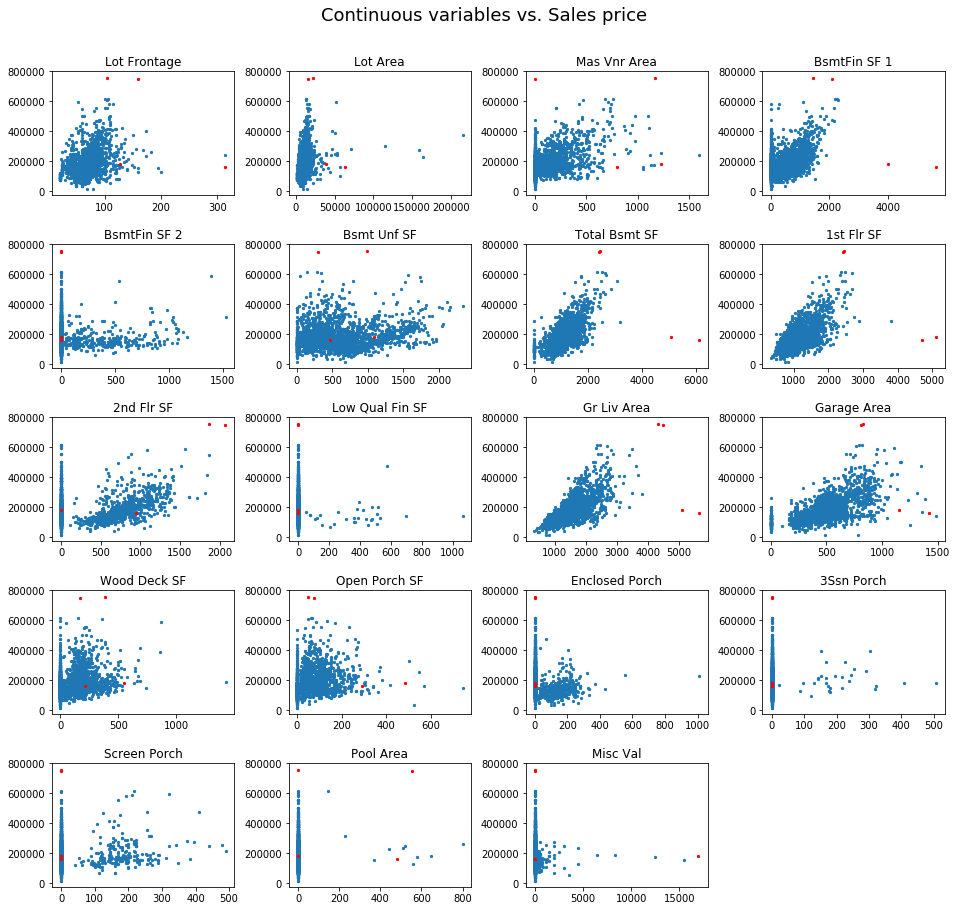

In [170]:
plot_against_sales_price(cont, is_outlier, 'Continuous variables vs. Sales price')

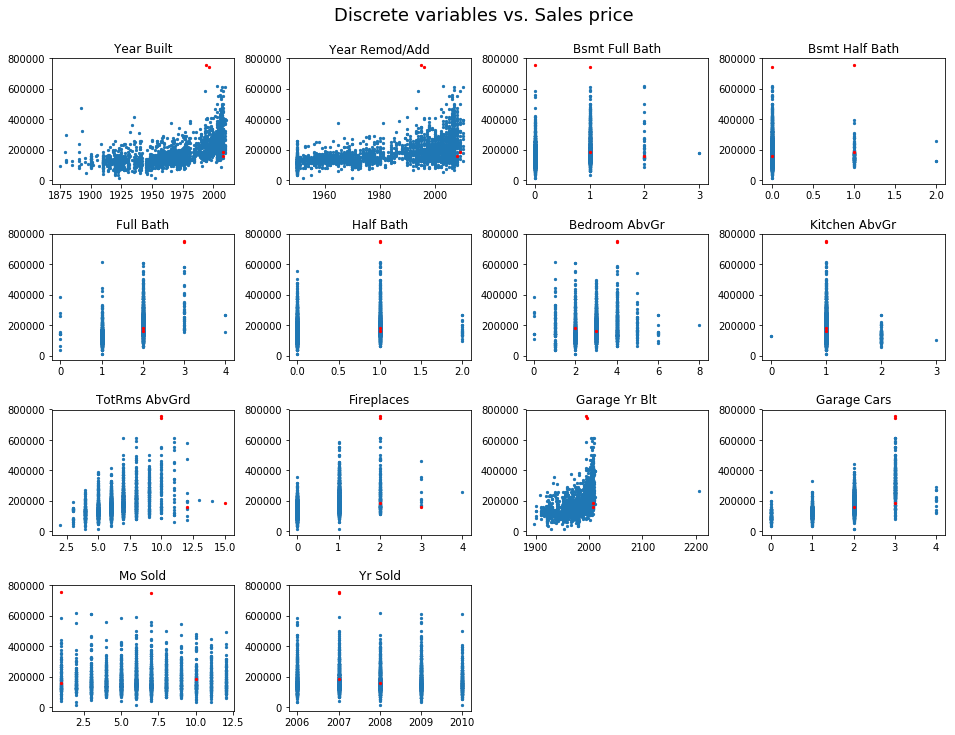

In [171]:
plot_against_sales_price(disc, is_outlier, 'Discrete variables vs. Sales price')

The result seems reasonnable.

In [172]:
# Remove outliers:
df_la_clean = df_la_clean[~is_outlier]

Due to time constraints, we put an end to step 3 here.

## Perform feature encoding<a name="stage-2"></a> ([top](#top))
---

In [178]:
# TODO

**`SalePrice`**: Our target variable is `SalePrice`, so we look at it first. We print its descriptive statistics and plot its distribution below. Turning to the Internet, we also found out that there are 2 related measures: [skewness](https://en.wikipedia.org/wiki/Skewness) and [kurtosis](https://en.wikipedia.org/wiki/Kurtosis) ("tailedness"), both available out-of-the-box in Pandas. We do not have any backround in statistics but, for comparison, the normal distribution has a skew of 0 and a kurtosis of 3. We also print these below.

In [173]:
def plot_distribution(series, xlabel):
    fig, ax = plt.subplots()
    ax.hist(series.dropna(), bins=100, color='cornflowerblue', ec='black', label=None)
    ax.axvline(series.mean(), color='red', linestyle='-', label='mean')
    ax.axvline(series.median(), color='lime', linestyle='-', label='median')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('count')
    ax.legend()
    plt.show()

In [174]:
series = df_la['SalePrice']
series.describe()

count      2430.000000
mean     180199.692593
std       79607.467171
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213099.750000
max      755000.000000
Name: SalePrice, dtype: float64

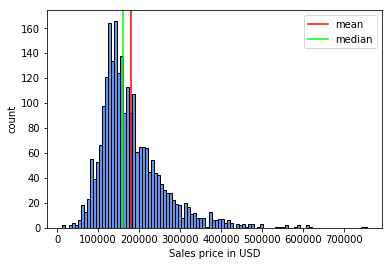

skewness: 1.79
kurtosis: 5.56


In [175]:
plot_distribution(series, 'Sales price in USD')
print(f'skewness: {series.skew():.2f}')
print(f'kurtosis: {series.kurt():.2f}')

**Comment:** As we have already seen in the course, the sales price is positively skewed and a log transformation allows to transform its distribution into one that is closer to the normal distribution. 

In [176]:
mod_series = np.log(series)
print(mod_series.describe())

count    2430.000000
mean       12.017742
std         0.408125
min         9.456341
25%        11.767568
50%        11.982929
75%        12.269516
max        13.534473
Name: SalePrice, dtype: float64


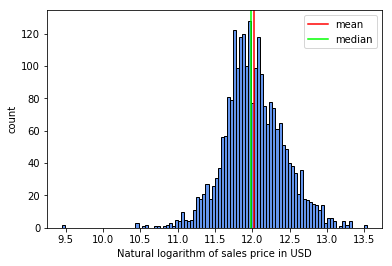

skewness: -0.06
kurtosis: 1.74


In [177]:
plot_distribution(mod_series, 'Natural logarithm of sales price in USD')
print(f'skewness: {mod_series.skew():.2f}')
print(f'kurtosis: {mod_series.kurt():.2f}')

## Perform feature engineering<a name="stage-3"></a> ([top](#top))
---

In [180]:
# TODO

We also keep a table for values that indicate the absence of a feature:
    
| Variable           | Value    | Meaning            |
|--------------------|----------|--------------------|
| Alley              | NA       | No alley access    |
| Mas Vnr Type       | None     | None               |
| Bsmt Qual          | NA       | No basement        |
| Bsmt Cond          | NA       | No basement        |
| Bsmt Exposure      | NA       | No basement        |
| BsmtFin Type 1     | NA       | No basement        |
| BsmtFin Type 2     | NA       | No basement        |
| Electrical         | Unknown  | Unknown            |
| Fireplace Qu       | NA       | No Fireplace       |
| Garage Type        | NA       | No garage          |
| Garage Finish      | NA       | No garage          |
| Garage Qual        | NA       | No garage          |
| Garage Cond        | NA       | No garage          |
| Pool QC            | NA       | No pool            |
| Fence              | NA       | No fence           |
| Misc Feature       | NA       | None               |